**Level 1**
**Task 2: Customer Segmentation**

Description:


*   Dataset (Recommended): Mall Customer (Kaggle).
*   Cluster customers into segments based on income and spending score.
*   Perform scaling and visual exploration of groupings.
*   Apply K-Means clustering and determine optimal number of clusters.
*   Train a linear regression model to estimate final score.
*   Visualize clusters using 2D plots.







Tools & Libraries:


*   Python
*   Pandas
*   Matplotlib
*   Scikit-Learn


Covered Topics:


*   Clustering
*   Unsupervised Learning






Bonus:


*   Try different clustering algorithms (e.g., DBSCAN).
*   Analyze average spending per cluster.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_excel('/content/Mall Customers.xlsx')

Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [ ]:
data.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


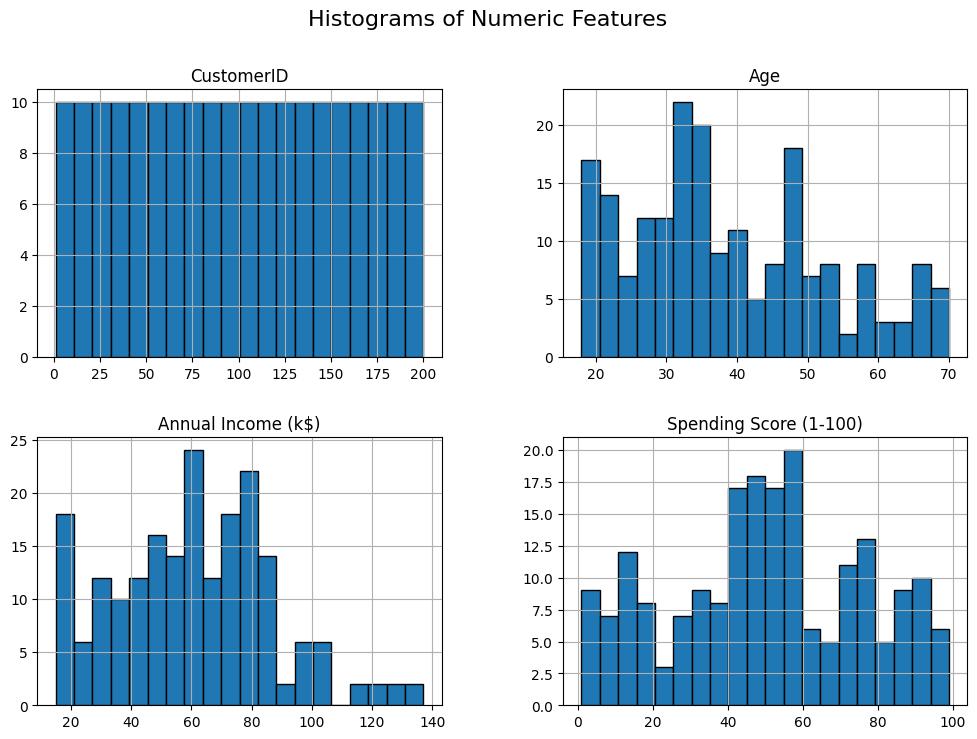

In [ ]:
data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

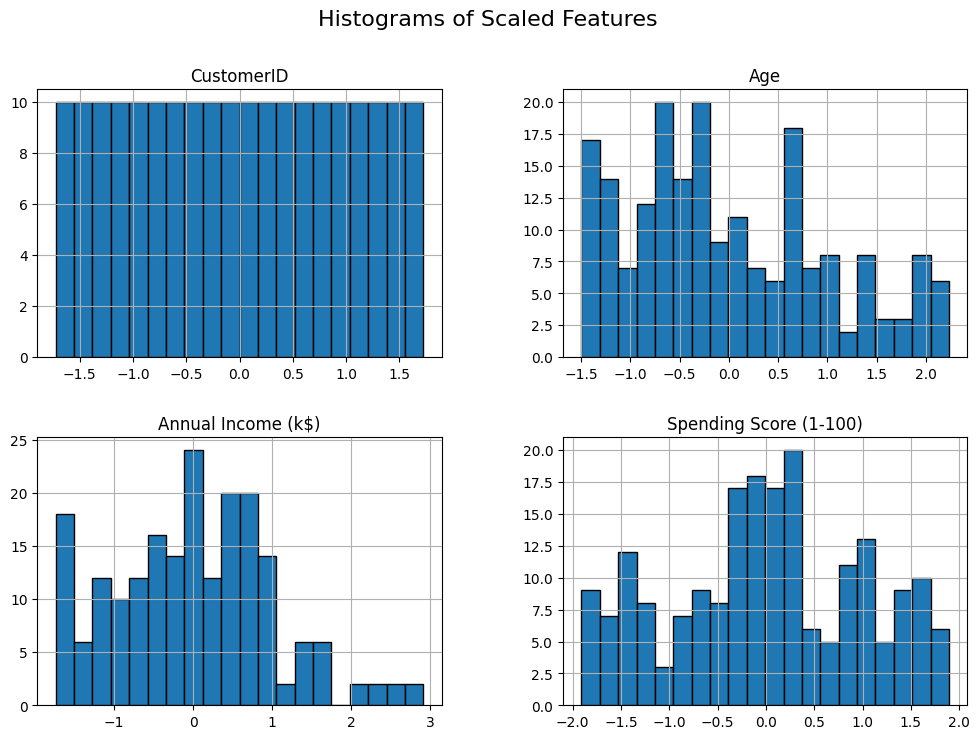

In [ ]:
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
scaled_data = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

scaled_data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.show()

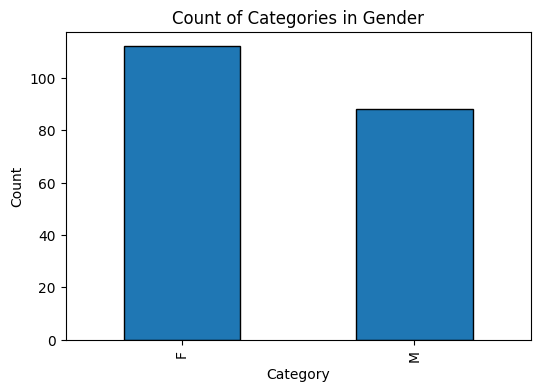

In [ ]:
plt.figure(figsize=(6, 4))
data["Gender"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Count of Categories in Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

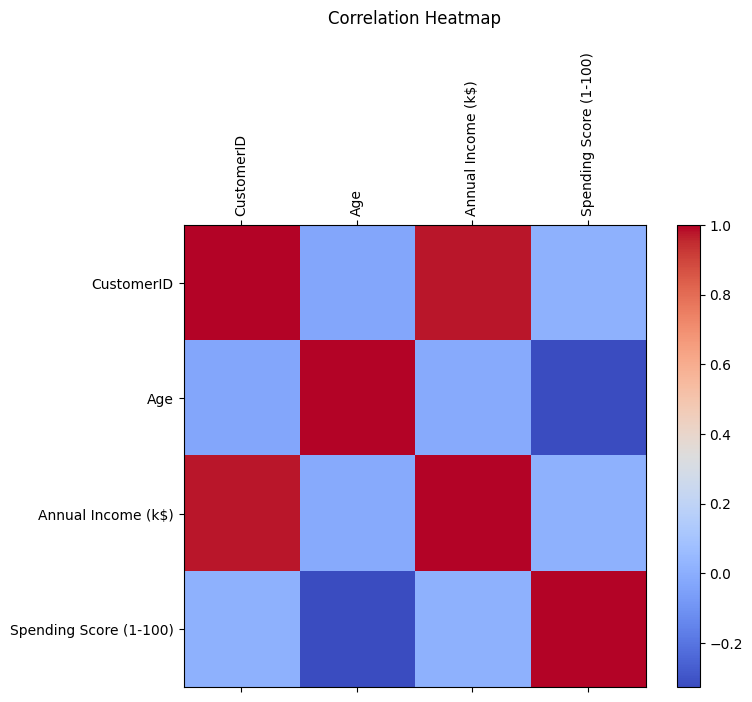

In [ ]:
corr = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Heatmap", pad=20)
plt.show()

Data Cleaning

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
## data cleaning
# handling missing values - done
# converting categorical variables - done
# addressing outliers - done
# removing duplicates and irrelavant data - done
# standardizing and correcting structural errors
# feature scaling (normalizion and standardization)

In [ ]:
# Handling Missing Values
round((data.isnull().sum()/data.shape[0])*100,2)

,0
CustomerID,0.0
Gender,0.0
Age,0.0
Education,0.0
Marital Status,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


In [ ]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
# Try clustering into 5 groups (common in this dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataset
data["Cluster"] = y_kmeans

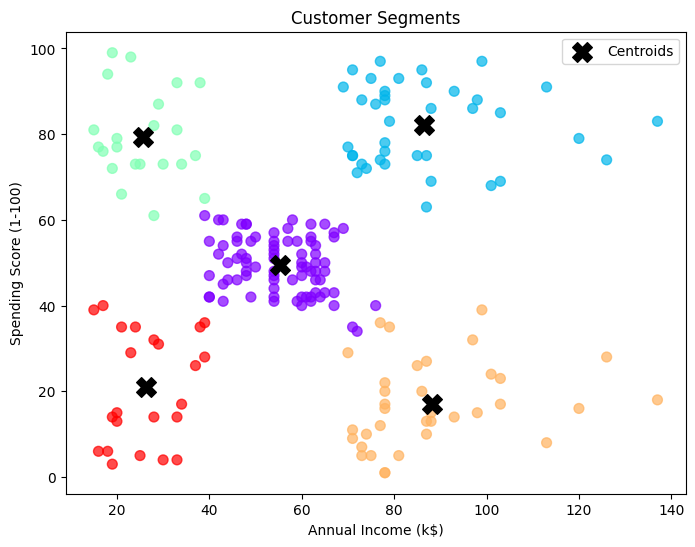

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=y_kmeans, cmap="rainbow", s=50, alpha=0.7)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend()
plt.show()

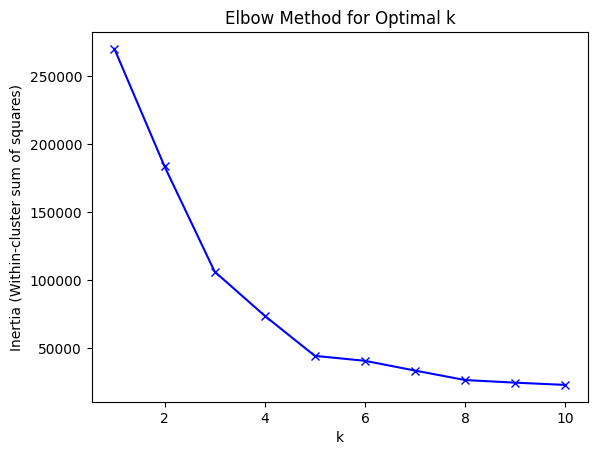

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels
data["Cluster"] = y_kmeans

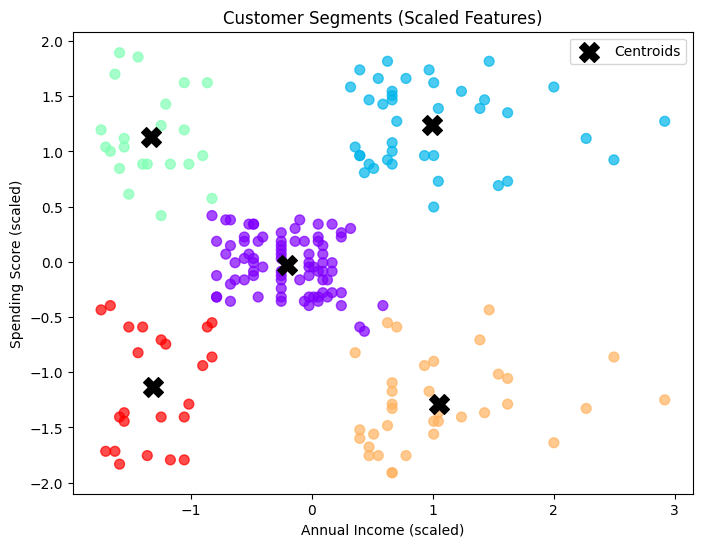

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap="rainbow", alpha=0.7, s=50)

# Plot cluster centers (on scaled space)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (Scaled Features)")
plt.legend()
plt.show()

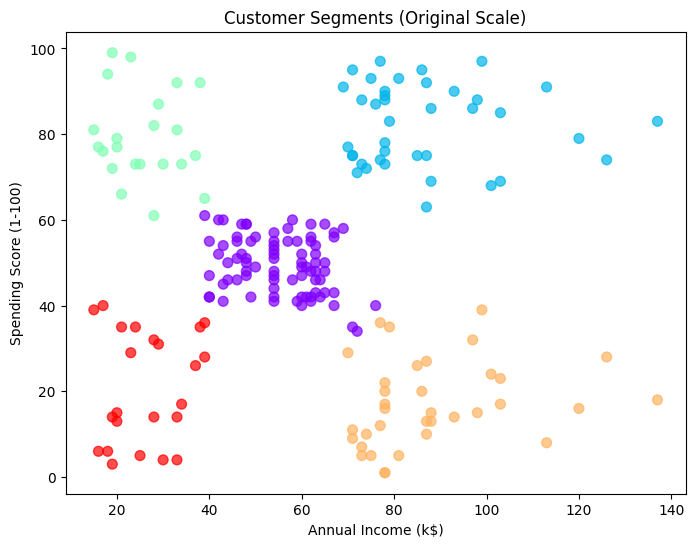

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"],
            c=y_kmeans, cmap="rainbow", alpha=0.7, s=50)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (Original Scale)")
plt.show()

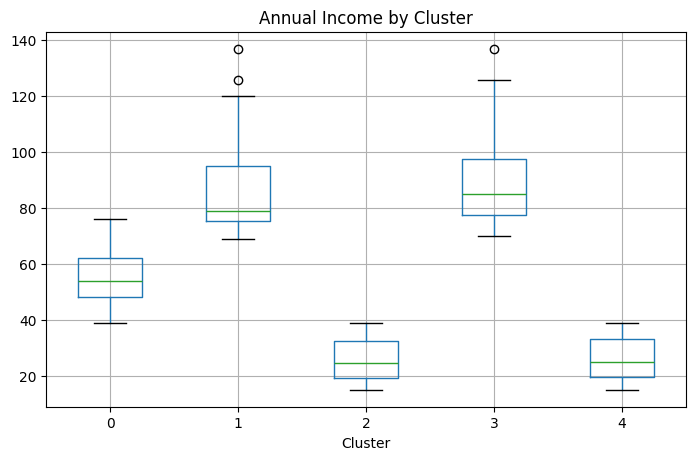

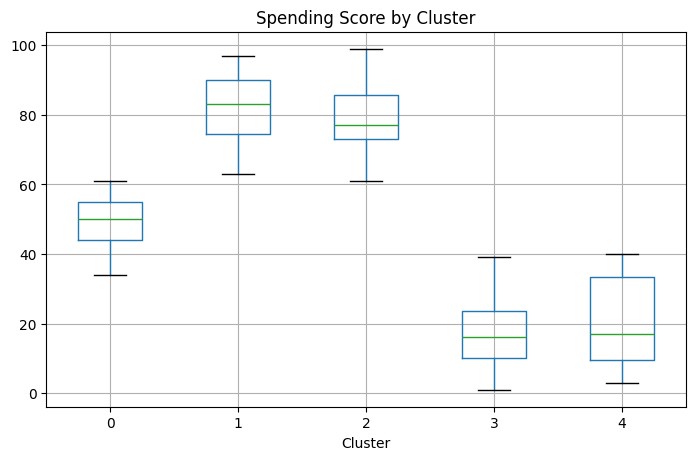

In [ ]:
data.boxplot(column="Annual Income (k$)", by="Cluster", figsize=(8,5))
plt.title("Annual Income by Cluster")
plt.suptitle("")
plt.show()

data.boxplot(column="Spending Score (1-100)", by="Cluster", figsize=(8,5))
plt.title("Spending Score by Cluster")
plt.suptitle("")
plt.show()

Other Clustering Algorithms

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels = agg.fit_predict(X_scaled)

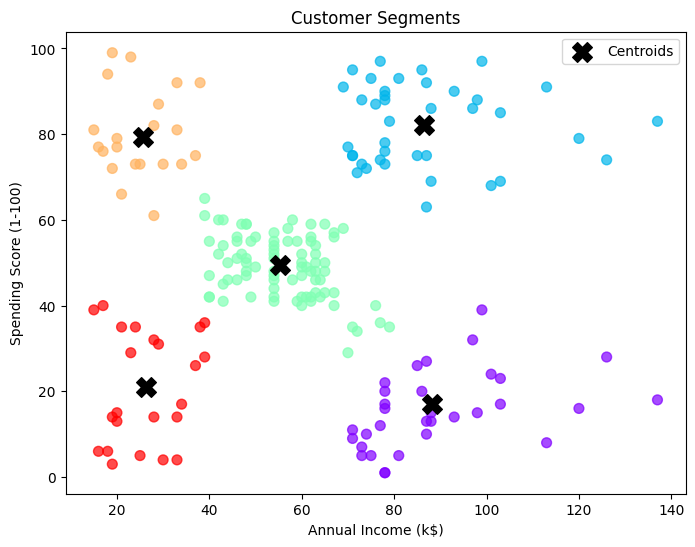

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=labels, cmap="rainbow", s=50, alpha=0.7)

# plot centroids (convert back to original scale for interpretation)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend()
plt.show()


In [ ]:
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)


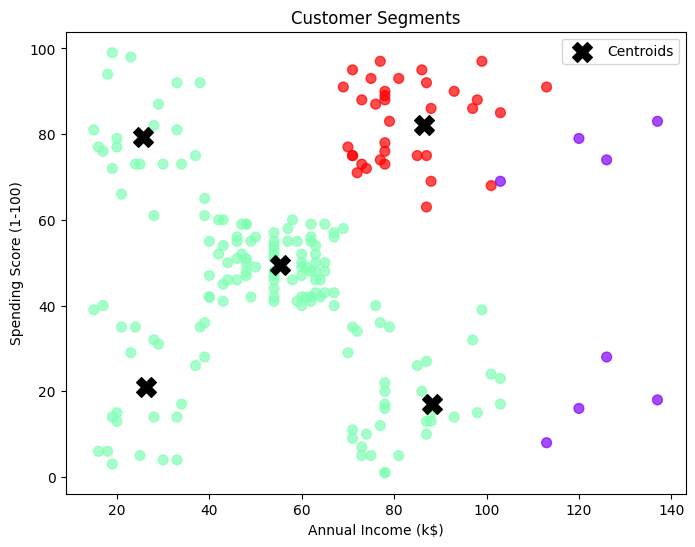

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=labels, cmap="rainbow", s=50, alpha=0.7)

# plot centroids (convert back to original scale for interpretation)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend()
plt.show()


In [ ]:
ms = MeanShift()
labels = ms.fit_predict(X_scaled)


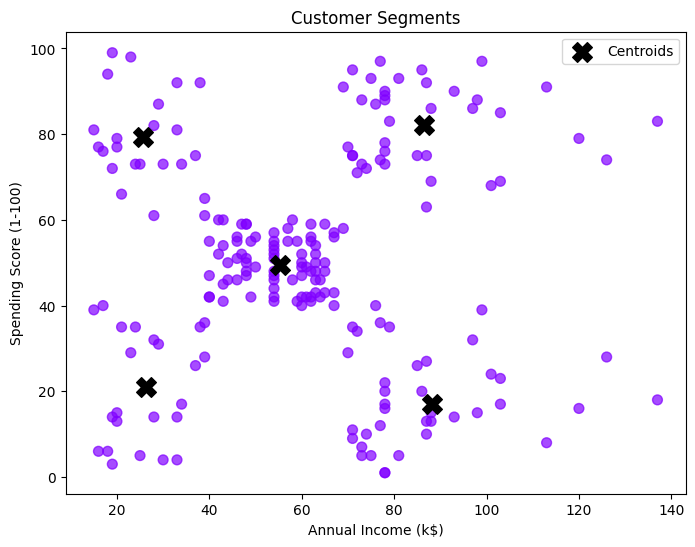

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=labels, cmap="rainbow", s=50, alpha=0.7)

# plot centroids (convert back to original scale for interpretation)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend()
plt.show()


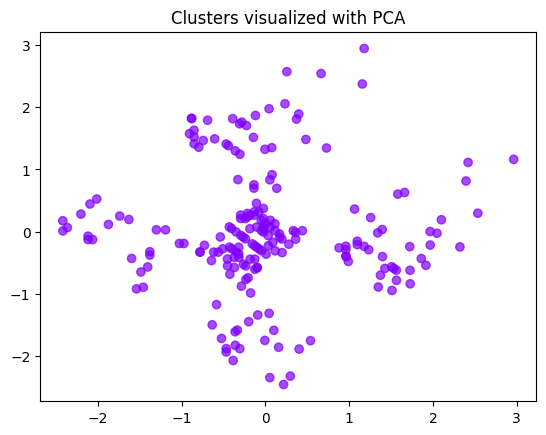

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="rainbow", alpha=0.7)
plt.title("Clusters visualized with PCA")
plt.show()

In [ ]:
algorithms = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

for name, algo in algorithms.items():
    labels = algo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    chi = calinski_harabasz_score(X_scaled, labels)
    print(f"{name}: Silhouette={sil:.3f}, DBI={dbi:.3f}, CHI={chi:.3f}")

KMeans: Silhouette=0.555, DBI=0.572, CHI=248.649
Agglomerative: Silhouette=0.554, DBI=0.578, CHI=244.410
DBSCAN: Silhouette=0.350, DBI=0.829, CHI=60.839


In [ ]:
avg_spending = data.groupby("Cluster")["Spending Score (1-100)"].mean()
print(avg_spending)

Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


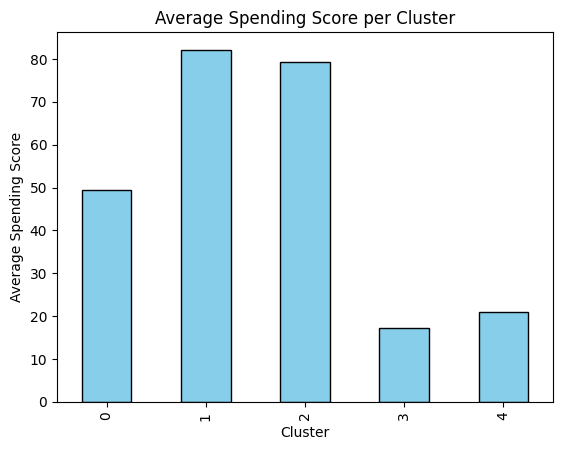

In [ ]:
avg_spending.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.show()

In [ ]:
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
